# 4. Redes neuronales y PCA

## Descripción

En este notebook se implementarán las redes neuronales y las PCA, y se evaluarán sus resultados.

## Librerías

In [1]:
import keras
import tensorflow as tf

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler #Para normalizar los datos.
from sklearn.model_selection import train_test_split #Para dividir el dataset en train y test.
from keras.models import Sequential
from keras.layers import Dense
from keras import backend as K #Para cambiar el learning rate.
import matplotlib.pyplot as plt
%matplotlib inline 

#Para evaluar las redes neuronales:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler #Para normalizar los datos.
from keras.layers import Dropout
from keras import regularizers
from numpy.random import seed

#PCA
from sklearn.decomposition import PCA

#Matrices de confusión
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#Bosques aleatorios
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:496: FutureWarn

## Carga de los datasets:

Norte de España:

In [2]:
excel_pob = pd.read_csv('/home/jovyan//PRÁCTICAS DESPOBLAMIENTO/DATOS/NUEVOS DATOS/excel_pob_variables.csv', sep=',',encoding="utf-8")
excel_pob

,MINMDT,MAXMDT,RANGEMDT,MEANMDT,STDMDT,MINPENDI,MAXPENDI,RANGEPENDI,MEANPENDI,STDPENDI,...,NFARMA,NCENTEDUC,DISTHOSPIT,DISTFARMA,DISTATPRIM,VIVTUR21,PLA21,CBMAS30,COB3G,COB4G
0,117,1394,1277,784.735210,233.924492,0.173360,46.501644,46.328284,20.298575,8.513073,...,1,2,16583.21167,5709.556279,5274.955751,2,13,0.00,0.96,0.94
1,271,2105,1834,1067.056635,382.986501,0.122584,61.203892,61.081307,22.556711,8.204898,...,4,10,19974.83089,4971.806926,3961.940782,58,264,1.00,1.00,1.00
2,99,2393,2294,817.504449,455.771315,0.346717,67.186058,66.839341,25.832286,11.384265,...,0,0,17540.29587,5485.216677,4285.074165,21,112,0.30,0.95,0.69
3,274,1113,839,506.502204,142.357363,0.122584,43.220619,43.098035,15.395220,6.130982,...,1,8,10146.40817,6522.937789,2496.420733,9,51,0.17,1.00,1.00
4,33,1151,1118,493.553497,218.406880,0.000000,42.763451,42.763451,17.966830,7.593164,...,2,0,15694.48914,3757.152641,4305.153512,15,72,0.75,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,139,300,161,189.077045,36.271257,0.000000,13.273371,13.273371,2.960418,2.437278,...,0,0,41271.99526,8612.545190,2227.740226,0,0,1.00,1.00,1.00
3685,831,1205,374,931.972503,73.191988,0.000000,26.876348,26.876348,7.047567,5.670949,...,0,0,35404.93621,18222.786360,2585.646631,0,0,0.95,1.00,1.00
3686,722,1129,407,863.795376,71.596410,0.173360,34.187431,34.014071,10.970295,5.792647,...,0,0,43033.52273,10831.081460,1943.478095,0,0,0.95,0.98,1.00
3687,241,770,529,413.819021,110.728010,0.000000,27.790625,27.790625,3.889147,3.862538,...,1,10,22120.23364,5762.972359,5572.568876,1,2,0.95,1.00,1.00


Cantabria:

In [3]:
excel_cantabria = pd.read_csv('/home/jovyan//PRÁCTICAS DESPOBLAMIENTO/DATOS/NUEVOS DATOS/excel_cantabria_variables.csv', sep=',')
excel_cantabria

,MINMDT,MAXMDT,RANGEMDT,MEANMDT,STDMDT,MINPENDI,MAXPENDI,RANGEPENDI,MEANPENDI,STDPENDI,...,NFARMA,NCENTEDUC,DISTHOSPIT,DISTFARMA,DISTATPRIM,VIVTUR21,PLA21,CBMAS30,COB3G,COB4G
0,65,552,487,220.690553,104.095285,0.000000,31.196602,31.196602,11.105984,6.565275,...,1,0,13305.256790,6689.805575,1503.589655,9,79,0.60,0.98,0.98
1,-6,218,224,57.649513,42.324675,0.000000,23.273787,23.273787,5.522714,4.048844,...,2,4,6086.627482,3558.752869,1682.295735,156,814,0.99,1.00,1.00
2,-3,391,394,141.156113,83.474135,0.122584,33.228851,33.106267,8.968757,5.108402,...,0,2,9033.361309,4085.905018,1657.810817,64,322,0.96,1.00,1.00
3,203,942,739,467.784320,140.755881,0.173360,37.476574,37.303214,14.057126,5.779102,...,0,0,18892.149520,9992.467164,1794.658987,5,33,0.00,1.00,1.00
4,112,828,716,329.966152,142.751930,0.122584,36.627811,36.505227,12.574647,6.543079,...,0,0,18897.890150,5427.973068,2070.778547,3,10,0.98,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,247,1682,1435,716.320500,251.176248,0.122584,62.624386,62.501801,22.598704,8.880146,...,1,2,33837.993620,5052.512126,4048.590984,10,50,0.29,1.00,1.00
96,150,870,720,429.996782,182.276557,0.000000,39.624466,39.624466,12.713040,6.913056,...,1,2,24542.374170,3364.998813,2203.640557,23,169,1.00,1.00,1.00
97,0,437,437,112.661945,80.694858,0.122584,27.935255,27.812671,8.587506,5.689353,...,0,0,9800.767314,9562.771833,1269.354330,10,64,0.98,1.00,1.00
98,152,735,583,363.969076,136.276553,0.274105,29.921757,29.647651,10.768345,5.145302,...,0,0,22527.063100,7025.784394,2412.441843,0,0,0.49,1.00,1.00


Se obtienen los targets siguiendo la definición de despoblamiento explicada en los notebooks anteriores.

In [4]:
y_todas = pd.read_csv('/home/jovyan//PRÁCTICAS DESPOBLAMIENTO/DATOS/NUEVOS DATOS/y_esp.csv', sep=',')
y_todas

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
3684,1.0
3685,1.0
3686,1.0
3687,0.0


In [5]:
y_todasC = pd.read_csv('/home/jovyan//PRÁCTICAS DESPOBLAMIENTO/DATOS/NUEVOS DATOS/y_can.csv', sep=',')
y_todasC

,0
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
95,1.0
96,1.0
97,0.0
98,1.0


## Escalado de los datos:

Se comienza estandarizando los datos:

In [6]:
scaler = StandardScaler()
x = scaler.fit_transform(excel_pob)
excel_pobE = pd.DataFrame(x)

In [7]:
scaler = StandardScaler()
XC = scaler.fit_transform(excel_cantabria)
excel_cantabriaE = pd.DataFrame(XC)

In [8]:
col_names = excel_pob.columns.values.tolist() #Para añadir los nombres de las columnas, puesto que la función scaler los elimina.
col_namesC = excel_cantabria.columns.values.tolist()

Comprobamos los datasets:

In [9]:
excel_pobE.columns = col_names
excel_pobE

,MINMDT,MAXMDT,RANGEMDT,MEANMDT,STDMDT,MINPENDI,MAXPENDI,RANGEPENDI,MEANPENDI,STDPENDI,...,NFARMA,NCENTEDUC,DISTHOSPIT,DISTFARMA,DISTATPRIM,VIVTUR21,PLA21,CBMAS30,COB3G,COB4G
0,-1.894245,0.781234,2.365533,-0.096812,1.890307,0.634482,1.538169,1.536628,2.579642,1.694014,...,0.499487,0.254355,-0.698368,-0.428667,2.805476,-0.110127,-0.100200,-1.581559,-0.486454,0.034681
1,-1.367077,2.413963,3.840085,0.818884,3.728375,0.314077,2.579694,2.585560,2.999029,1.576189,...,2.955208,2.358199,-0.497689,-0.570246,1.524236,2.884533,2.402011,0.780057,0.218319,0.357077
2,-1.955862,3.075322,5.057847,0.009473,4.625877,1.728396,3.003478,2.994953,3.607376,2.791761,...,-0.319086,-0.271606,-0.641738,-0.471720,1.839549,0.905919,0.886728,-0.873075,-0.662647,-1.308636
3,-1.356807,0.135950,1.206011,-0.999248,0.761202,0.314077,1.305738,1.306959,1.668979,0.783265,...,0.499487,1.832238,-1.079227,-0.272575,0.094181,0.264206,0.278620,-1.180085,0.218319,0.357077
4,-2.181792,0.223212,1.944611,-1.041247,1.698961,-0.459451,1.273351,1.283171,2.146585,1.342303,...,1.318061,-0.271606,-0.750953,-0.803346,1.859143,0.585062,0.487969,0.189653,0.218319,0.357077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,-1.818936,-1.731011,-0.588865,-2.028802,-0.546934,-0.459451,-0.815761,-0.813558,-0.640442,-0.628955,...,-0.319086,-0.271606,0.762442,0.128434,-0.167998,-0.217079,-0.229797,0.780057,0.218319,0.357077
3685,0.549900,0.347217,-0.024988,0.380745,-0.091669,-0.459451,0.147890,0.153606,0.118633,0.607380,...,-0.319086,-0.271606,0.415294,1.972699,0.181247,-0.217079,-0.229797,0.661976,0.218319,0.357077
3686,0.176775,0.172692,0.062374,0.159616,-0.111343,0.634482,0.665816,0.661094,0.847171,0.653909,...,-0.319086,-0.271606,0.866669,0.554185,-0.445381,-0.217079,-0.229797,0.661976,-0.134067,0.357077
3687,-1.469772,-0.651710,0.385345,-1.299862,0.371184,-0.459451,0.212658,0.218611,-0.467957,-0.084033,...,0.499487,2.358199,-0.370748,-0.418417,3.095887,-0.163603,-0.209859,0.661976,0.218319,0.357077


In [10]:
excel_cantabriaE.columns = col_names
excel_cantabriaE

,MINMDT,MAXMDT,RANGEMDT,MEANMDT,STDMDT,MINPENDI,MAXPENDI,RANGEPENDI,MEANPENDI,STDPENDI,...,NFARMA,NCENTEDUC,DISTHOSPIT,DISTFARMA,DISTATPRIM,VIVTUR21,PLA21,CBMAS30,COB3G,COB4G
0,-0.402693,-0.585066,-0.515073,-0.571959,-0.484544,-0.617680,-0.750495,-0.745158,-0.240601,-0.168367,...,0.051709,-0.408267,-0.573005,0.286487,-1.032450,-0.592289,-0.479842,-0.092757,-0.348018,0.103243
1,-0.707666,-1.150462,-1.052907,-1.038143,-1.114631,-0.617680,-1.445488,-1.443370,-1.252196,-1.518940,...,0.698068,0.151003,-1.087375,-0.829832,-0.863504,2.879259,2.950267,0.809371,0.167564,0.223996
2,-0.694780,-0.857607,-0.705258,-0.799372,-0.694889,0.139471,-0.572225,-0.576865,-0.627831,-0.950273,...,-0.594651,-0.128632,-0.877403,-0.641886,-0.886652,0.706590,0.654194,0.739976,0.167564,0.223996
3,0.190071,0.075127,0.000266,0.134557,-0.110590,0.453093,-0.199613,-0.207002,0.294096,-0.590308,...,-0.594651,-0.408267,-0.174906,1.463990,-0.757277,-0.686752,-0.694515,-1.480646,0.167564,0.223996
4,-0.200810,-0.117853,-0.046769,-0.259507,-0.090229,0.139471,-0.274067,-0.277326,0.025496,-0.180280,...,-0.594651,-0.408267,-0.174497,-0.163396,-0.496238,-0.733984,-0.801852,0.786239,0.167564,0.223996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.379068,1.327800,1.423584,0.845198,1.015747,0.139471,2.006364,2.013668,1.841687,1.074028,...,0.051709,-0.128632,0.890074,-0.297260,1.373555,-0.568673,-0.615180,-0.809833,0.167564,0.223996
96,-0.037585,-0.046755,-0.038589,0.026511,0.312939,-0.617680,-0.011199,-0.002438,0.050570,0.018287,...,0.051709,-0.128632,0.227706,-0.898911,-0.370633,-0.261665,-0.059829,0.832502,0.167564,0.223996
97,-0.681894,-0.779738,-0.617323,-0.880846,-0.723239,0.139471,-1.036582,-1.043373,-0.696907,-0.638476,...,-0.594651,-0.408267,-0.822721,1.310790,-1.253892,-0.568673,-0.549844,0.786239,0.167564,0.223996
98,-0.028994,-0.275283,-0.318754,-0.162282,-0.156281,1.075354,-0.862325,-0.881662,-0.301776,-0.930469,...,-0.594651,-0.408267,0.084103,0.406274,-0.173235,-0.804832,-0.848520,-0.347204,0.167564,0.223996


## Partición en train y set

Juntamos primeramente las variables objetivo con el resto de variables en un mismo dataset para poder hacer la partición:

In [11]:
excel_pobE['y_todas'] = y_todas
excel_cantabriaE['y_todasC'] = y_todasC

In [12]:
#España
seed(2022)
train, test = train_test_split(excel_pobE, test_size=0.3)

#Cantabria
train_C, test_C = train_test_split(excel_cantabriaE, test_size=0.3)

Eliminamos los missing values, si los hubiera:

In [13]:
train = train.dropna()
test = test.dropna()

train_C = train_C.dropna()
test_C = test_C.dropna()

In [14]:
#Train
train_todas = train['y_todas']
train_todasC = train_C['y_todasC']

#Test
test_todas = test['y_todas']
test_todasC = test_C['y_todasC']

In [15]:
#Eliminamos la variable objetivo de los datasets.
train = train.drop(['y_todas'], axis=1)
train_C = train_C.drop(['y_todasC'], axis=1)

test = test.drop(['y_todas'], axis=1)
test_C = test_C.drop(['y_todasC'], axis=1)

## Redes neuronales

### Todas las definiciones de despoblamiento en España:

Empezamos creando el modelo de redes neuronales para todas las comunidades autónomas del norte de España:

In [16]:
keras.backend.clear_session()

In [17]:
seed(2022)
model1 = Sequential()
model1.add(Dense(256, input_dim=train.shape[1], activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

In [18]:
optimizer1 = keras.optimizers.adam(lr=0.00001)

In [19]:
model1.compile(loss='binary_crossentropy', optimizer=optimizer1, metrics=['accuracy'])

In [20]:
seed(2022) #Se añade una semilla para asegurar que los resultados sean reproducibles.
history1 = model1.fit(train, train_todas, epochs=512, batch_size=256, validation_split=0.2, verbose=1)

Train on 2065 samples, validate on 517 samples
Epoch 1/512
2065/2065 [==============================] - 2s 849us/step - loss: 0.8259 - acc: 0.1056 - val_loss: 0.8342 - val_acc: 0.0851
Epoch 2/512
2065/2065 [==============================] - 0s 53us/step - loss: 0.8160 - acc: 0.1065 - val_loss: 0.8236 - val_acc: 0.0870
Epoch 3/512
2065/2065 [==============================] - 0s 49us/step - loss: 0.8067 - acc: 0.1080 - val_loss: 0.8134 - val_acc: 0.0890
Epoch 4/512
2065/2065 [==============================] - 0s 50us/step - loss: 0.7977 - acc: 0.1109 - val_loss: 0.8038 - val_acc: 0.0909
Epoch 5/512
2065/2065 [==============================] - 0s 49us/step - loss: 0.7892 - acc: 0.1148 - val_loss: 0.7949 - val_acc: 0.0928
Epoch 6/512
2065/2065 [==============================] - 0s 49us/step - loss: 0.7813 - acc: 0.1167 - val_loss: 0.7863 - val_acc: 0.1044
Epoch 7/512
2065/2065 [==============================] - 0s 50us/step - loss: 0.7738 - acc: 0.1225 - val_loss: 0.7782 - val_acc: 0.1083


In [21]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               16896     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 60,401
Trainable params: 60,401
Non-trainable params: 0
_________________________________________________________________


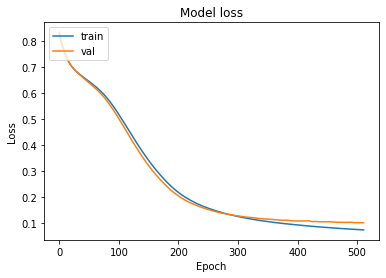

In [22]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

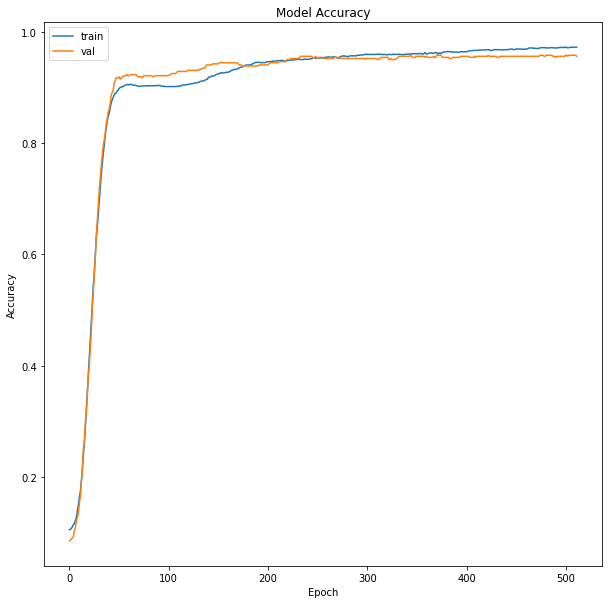

In [23]:
#Accuracy train y validation
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Evaluación del modelo

In [24]:
prediction_todas = model1.predict(test)

Curva ROC y AUC:

In [25]:
roc_auc_score(test_todas, prediction_todas)

0.9833453472583106

In [26]:
roc_auc_score(test_todas, prediction_todas)
false_positive_rate_todas, true_positive_rate_todas, threshold_todas = roc_curve(test_todas, prediction_todas)

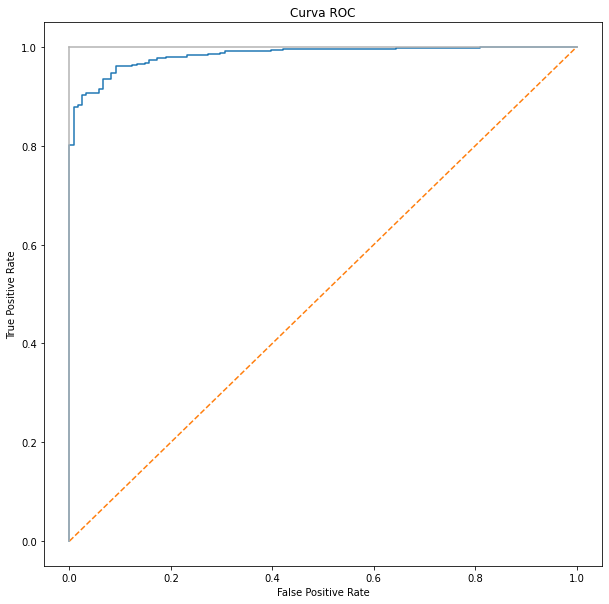

In [27]:
plt.subplots(1, figsize=(10,10))
plt.title('Curva ROC')
plt.plot(false_positive_rate_todas, true_positive_rate_todas)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Matriz de confusión:

In [28]:
prediction_todas[prediction_todas >= 0.5] = 1.0
prediction_todas[prediction_todas < 0.5] = 0.0
prediction_todas = pd.DataFrame(prediction_todas)
prediction_todas

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1102,1.0
1103,1.0
1104,1.0
1105,1.0


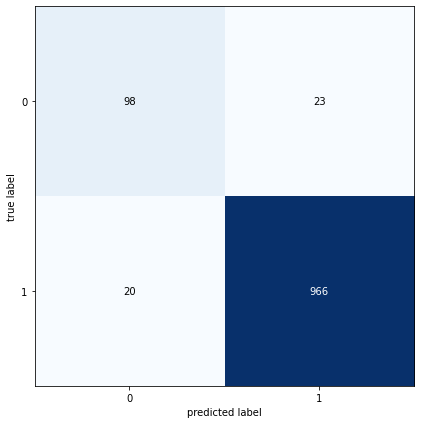

In [29]:
matriz11 = confusion_matrix(test_todas, prediction_todas)

plot_confusion_matrix(conf_mat=matriz11, figsize=(6,6), show_normed=False)
plt.tight_layout()

### Todas las definiciones de despoblamiento en Cantabria:

Repetimos el mismo procedimiento para Cantabria.

In [30]:
keras.backend.clear_session()

In [31]:
seed(2022)
model2 = Sequential()
model2.add(Dense(8, input_dim=train_C.shape[1], activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [32]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 528       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 569
Trainable params: 569
Non-trainable params: 0
_________________________________________________________________


In [33]:
optimizer2 = keras.optimizers.adam(lr=0.001)

In [34]:
model2.compile(loss='binary_crossentropy', optimizer=optimizer2, metrics=['accuracy'])

In [35]:
seed(2022)
history2 = model2.fit(train_C, train_todasC, epochs=128, batch_size=64, validation_split=0.2, verbose=1)

Train on 56 samples, validate on 14 samples
Epoch 1/128
56/56 [==============================] - 1s 22ms/step - loss: 1.1285 - acc: 0.2143 - val_loss: 1.2994 - val_acc: 0.0714
Epoch 2/128
56/56 [==============================] - 0s 153us/step - loss: 1.0948 - acc: 0.2679 - val_loss: 1.2618 - val_acc: 0.0714
Epoch 3/128
56/56 [==============================] - 0s 108us/step - loss: 1.0619 - acc: 0.2857 - val_loss: 1.2255 - val_acc: 0.0714
Epoch 4/128
56/56 [==============================] - 0s 108us/step - loss: 1.0299 - acc: 0.3036 - val_loss: 1.1907 - val_acc: 0.0714
Epoch 5/128
56/56 [==============================] - 0s 115us/step - loss: 0.9962 - acc: 0.3036 - val_loss: 1.1573 - val_acc: 0.1429
Epoch 6/128
56/56 [==============================] - 0s 123us/step - loss: 0.9637 - acc: 0.3393 - val_loss: 1.1254 - val_acc: 0.1429
Epoch 7/128
56/56 [==============================] - 0s 119us/step - loss: 0.9331 - acc: 0.3750 - val_loss: 1.0936 - val_acc: 0.1429
Epoch 8/128
56/56 [=======

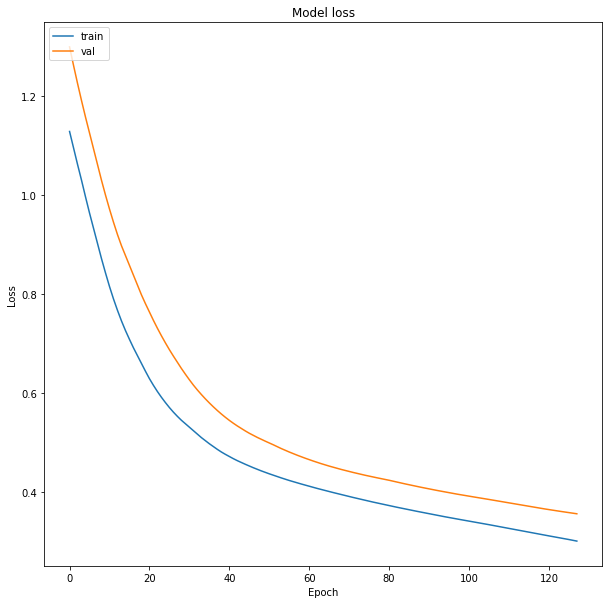

In [36]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

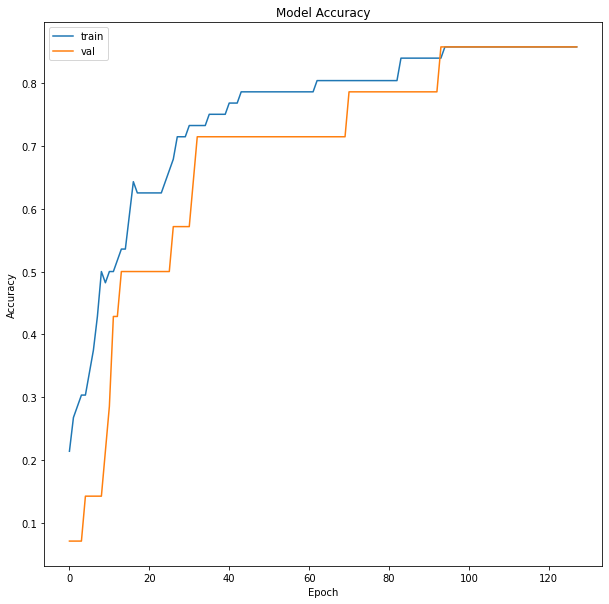

In [37]:
#Accuracy train y validation
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#### Evaluación del modelo

In [38]:
prediction_todasC = model2.predict(test_C)

Curva ROC Y AUC:

In [39]:
roc_auc_score(test_todasC, prediction_todasC)

0.9153439153439153

In [40]:
roc_auc_score(test_todasC, prediction_todasC)
false_positive_rate_todasC, true_positive_rate_todasC, threshold_todasC = roc_curve(test_todasC, prediction_todasC)

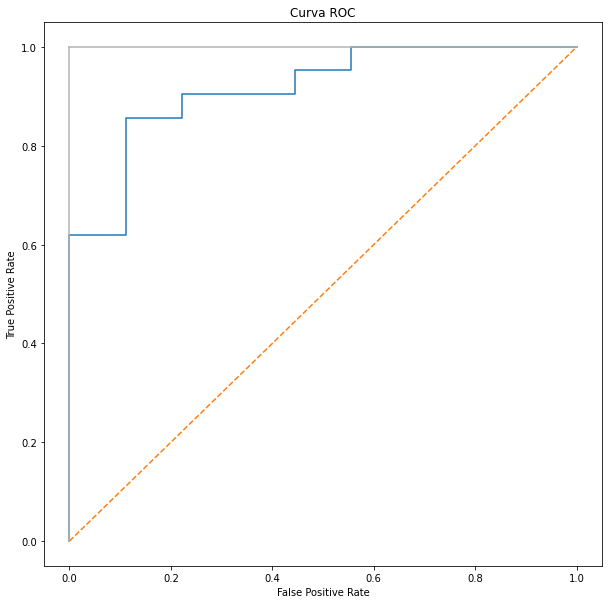

In [41]:
plt.subplots(1, figsize=(10,10))
plt.title('Curva ROC')
plt.plot(false_positive_rate_todasC, true_positive_rate_todasC)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Matriz de confusión:

In [42]:
prediction_todasC[prediction_todasC >= 0.5] = 1.0
prediction_todasC[prediction_todasC < 0.5] = 0.0
prediction_todasC = pd.DataFrame(prediction_todasC)
prediction_todasC

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,1.0


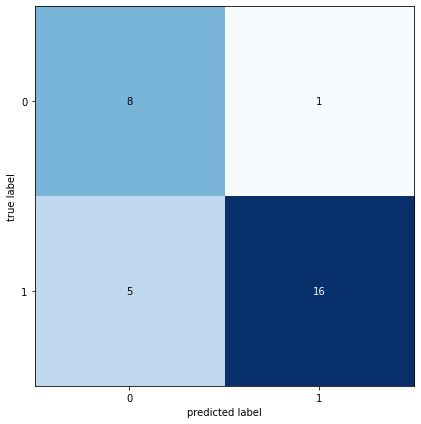

In [43]:
matriz11C = confusion_matrix(test_todasC, prediction_todasC)

plot_confusion_matrix(conf_mat=matriz11C, figsize=(6,6), show_normed=False)
plt.tight_layout()

## PCA

Aplicamos la técnica de análisis de componentes principales para reducir la dimensionalidad.

In [44]:
frames = [train,test] #Concatenamos en primer lugar el dataset de train y test para realizar el análisis.
new_pob = pd.concat(frames)

Porcentaje de varianza explicado:

Text(0, 0.5, 'Varianza explicada acumulada')

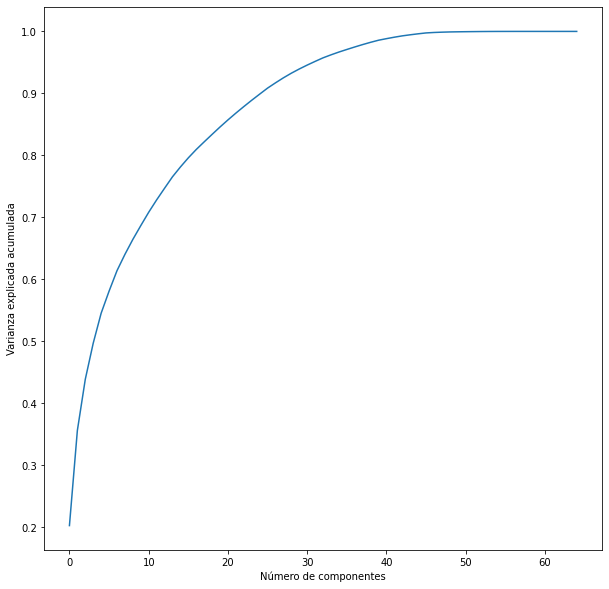

In [45]:
pca = PCA().fit(new_pob)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')

#### Caso 1: 35 componentes.

Repetimos el modelo de redes neuronales, seleccionando 35 componentes principales, puesto que explican gran parte de la varianza.

In [46]:
pca = PCA(n_components=35) #Inicializamos un objeto clase PCA
pca.fit(new_pob) #Calcula las direcciones de las componentes
X_r = pca.fit_transform(new_pob) #Transformamos los datos en el espacio reducido.

print(sum(pca.explained_variance_ratio_))

0.9667058988444082


In [47]:
X = pd.DataFrame(X_r)

In [48]:
X

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.716144,0.047791,-1.859102,-0.248434,-0.882369,1.230877,-0.277872,-2.375747,-1.193704,-0.677687,...,-0.067820,0.191638,-0.354388,-0.582475,0.290096,0.609397,0.143812,-0.227142,-0.687465,0.841265
1,-2.985611,-2.307112,0.350986,2.345007,1.335591,0.097111,1.217059,-1.616086,0.970914,0.378932,...,-0.173459,-0.047939,-0.136453,0.449080,0.566294,0.420760,-0.265276,0.240399,0.419185,-0.004895
2,-1.736159,4.309577,0.382104,0.390570,0.182228,1.001196,0.692280,1.018057,-0.220131,-0.095764,...,-0.038649,-1.160832,0.367158,-0.721940,-0.267551,0.348405,-0.102420,-0.092323,-1.325389,-0.148455
3,1.522601,-3.479380,-2.227285,-2.554990,2.158585,-0.944310,0.951989,-0.027019,-0.177782,-1.266771,...,-0.821018,0.458746,-0.602557,-0.495778,0.540981,0.007703,-1.640786,-0.872415,-0.372659,-0.565442
4,-1.983121,2.654666,-0.171048,0.886583,-0.428093,-0.217498,-1.073441,-1.909993,-0.649836,0.059111,...,0.034335,0.489674,-0.463607,-0.440609,-0.237316,-0.103433,-0.531004,0.473822,-0.103353,-0.129252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1.632129,-3.159809,-1.687426,-1.171605,-0.399750,0.554577,0.297718,-0.761295,-0.996708,1.269977,...,-1.885338,-0.806624,0.333664,-0.468958,0.171044,0.405252,-0.145454,0.044678,-0.318721,0.280394
3685,0.020798,-1.892926,-3.291085,-3.604135,0.899639,-0.853824,-0.284356,-0.598456,-1.194539,0.989775,...,0.601735,0.314236,-0.096007,-0.064257,-0.092041,0.873910,0.963800,0.622897,-0.212889,0.341339
3686,1.575256,2.325009,0.954166,0.463785,-1.182472,1.215814,2.467509,-0.506913,3.494456,-3.941921,...,0.272985,1.103677,-0.908924,0.800274,1.346729,-0.245008,0.017207,2.054150,-0.221346,0.174987
3687,-2.184715,-1.986917,1.278417,0.250396,0.509501,1.903211,0.080368,-0.682032,-2.072881,0.146462,...,0.264273,-0.417505,0.257342,-0.039563,-0.487358,0.535181,0.109663,0.020645,0.270203,0.428788


In [49]:
X

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-0.716144,0.047791,-1.859102,-0.248434,-0.882369,1.230877,-0.277872,-2.375747,-1.193704,-0.677687,...,-0.067820,0.191638,-0.354388,-0.582475,0.290096,0.609397,0.143812,-0.227142,-0.687465,0.841265
1,-2.985611,-2.307112,0.350986,2.345007,1.335591,0.097111,1.217059,-1.616086,0.970914,0.378932,...,-0.173459,-0.047939,-0.136453,0.449080,0.566294,0.420760,-0.265276,0.240399,0.419185,-0.004895
2,-1.736159,4.309577,0.382104,0.390570,0.182228,1.001196,0.692280,1.018057,-0.220131,-0.095764,...,-0.038649,-1.160832,0.367158,-0.721940,-0.267551,0.348405,-0.102420,-0.092323,-1.325389,-0.148455
3,1.522601,-3.479380,-2.227285,-2.554990,2.158585,-0.944310,0.951989,-0.027019,-0.177782,-1.266771,...,-0.821018,0.458746,-0.602557,-0.495778,0.540981,0.007703,-1.640786,-0.872415,-0.372659,-0.565442
4,-1.983121,2.654666,-0.171048,0.886583,-0.428093,-0.217498,-1.073441,-1.909993,-0.649836,0.059111,...,0.034335,0.489674,-0.463607,-0.440609,-0.237316,-0.103433,-0.531004,0.473822,-0.103353,-0.129252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1.632129,-3.159809,-1.687426,-1.171605,-0.399750,0.554577,0.297718,-0.761295,-0.996708,1.269977,...,-1.885338,-0.806624,0.333664,-0.468958,0.171044,0.405252,-0.145454,0.044678,-0.318721,0.280394
3685,0.020798,-1.892926,-3.291085,-3.604135,0.899639,-0.853824,-0.284356,-0.598456,-1.194539,0.989775,...,0.601735,0.314236,-0.096007,-0.064257,-0.092041,0.873910,0.963800,0.622897,-0.212889,0.341339
3686,1.575256,2.325009,0.954166,0.463785,-1.182472,1.215814,2.467509,-0.506913,3.494456,-3.941921,...,0.272985,1.103677,-0.908924,0.800274,1.346729,-0.245008,0.017207,2.054150,-0.221346,0.174987
3687,-2.184715,-1.986917,1.278417,0.250396,0.509501,1.903211,0.080368,-0.682032,-2.072881,0.146462,...,0.264273,-0.417505,0.257342,-0.039563,-0.487358,0.535181,0.109663,0.020645,0.270203,0.428788


Realizamos la partición en train y test. Recordemos que ya se barajearon las muestras en la partición de train y test original, por lo que no es necesario realizarlo otra vez (shuffle=False). Además, si se barajean, los datos no coincidirían con sus equivalentes en el target.

In [50]:
#España
seed(2022)
x_train_pob1, x_test_pob1 = train_test_split(X, test_size=0.3, shuffle=False)

Modelo de redes neuronales para la PCA:

In [51]:
keras.backend.clear_session()

In [52]:
seed(2022)
model11 = Sequential()
model11.add(Dense(256, input_dim=x_train_pob1.shape[1], activation='relu'))
model11.add(Dense(128, activation='relu'))
model11.add(Dense(64, activation='relu'))
model11.add(Dense(32, activation='relu'))
model11.add(Dense(8, activation='relu'))
model11.add(Dense(1, activation='sigmoid'))

In [53]:
model11.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               9216      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 52,721
Trainable params: 52,721
Non-trainable params: 0
_________________________________________________________________


In [54]:
optimizer11 = keras.optimizers.adam(lr=0.00001)

In [55]:
model11.compile(loss='binary_crossentropy', optimizer=optimizer11, metrics=['accuracy'])

In [56]:
seed(2022)
history11 = model11.fit(x_train_pob1, train_todas, epochs=512, batch_size=256, validation_split=0.2, verbose=1)

Train on 2065 samples, validate on 517 samples
Epoch 1/512
2065/2065 [==============================] - 2s 899us/step - loss: 0.8264 - acc: 0.1065 - val_loss: 0.8314 - val_acc: 0.0851
Epoch 2/512
2065/2065 [==============================] - 0s 48us/step - loss: 0.8169 - acc: 0.1094 - val_loss: 0.8216 - val_acc: 0.0870
Epoch 3/512
2065/2065 [==============================] - 0s 51us/step - loss: 0.8079 - acc: 0.1119 - val_loss: 0.8120 - val_acc: 0.0870
Epoch 4/512
2065/2065 [==============================] - 0s 47us/step - loss: 0.7994 - acc: 0.1162 - val_loss: 0.8028 - val_acc: 0.0967
Epoch 5/512
2065/2065 [==============================] - 0s 51us/step - loss: 0.7913 - acc: 0.1201 - val_loss: 0.7945 - val_acc: 0.1122
Epoch 6/512
2065/2065 [==============================] - 0s 50us/step - loss: 0.7839 - acc: 0.1245 - val_loss: 0.7864 - val_acc: 0.1199
Epoch 7/512
2065/2065 [==============================] - 0s 50us/step - loss: 0.7766 - acc: 0.1375 - val_loss: 0.7787 - val_acc: 0.1219


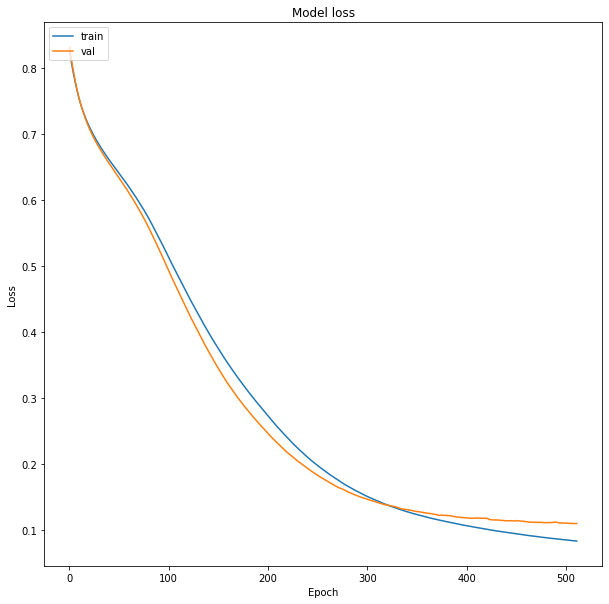

In [57]:
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

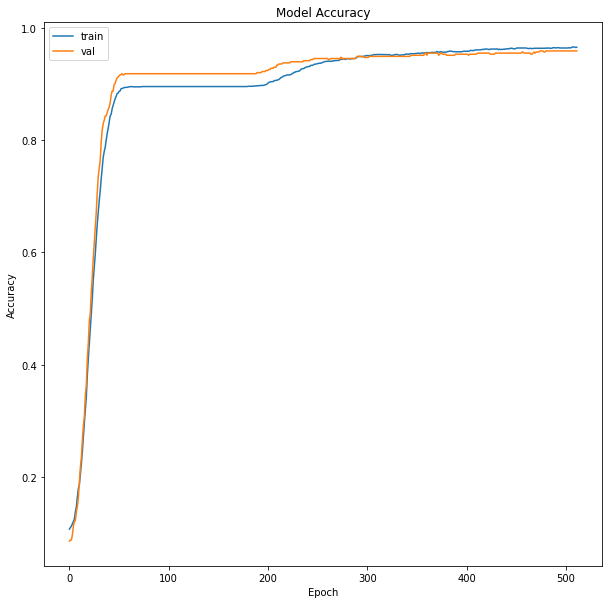

In [58]:
#Accuracy train y validation
plt.plot(history11.history['acc'])
plt.plot(history11.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Se ha empleado la misma red neuronal que se utilizó en el caso del dataset completo y los resultados obtenidos son muy similares.

#### Evaluación del modelo

In [59]:
prediction11 = model11.predict(x_test_pob1)

Curva ROC:

In [60]:
roc_auc_score(test_todas, prediction11)

0.9831777110958376

In [61]:
# roc_auc_score(y_test_pob1, prediction11)
false_positive_rate_todas11, true_positive_rate_todas11, threshold_todas11 = roc_curve(test_todas, prediction11)

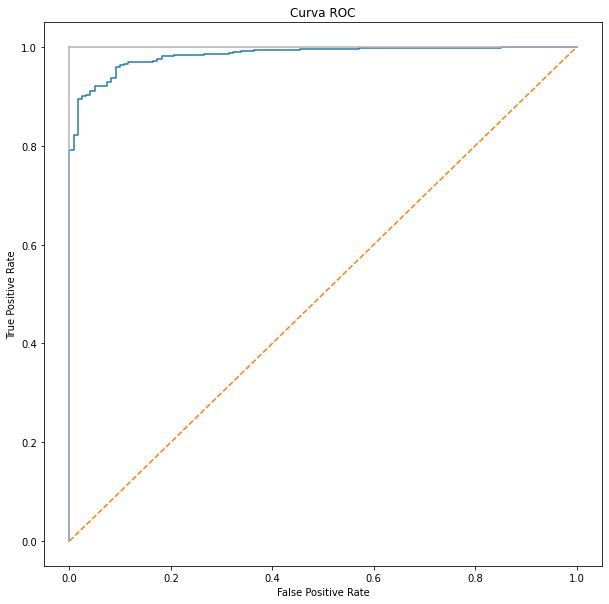

In [62]:
plt.subplots(1, figsize=(10,10))
plt.title('Curva ROC')
plt.plot(false_positive_rate_todas11, true_positive_rate_todas11)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Matriz de confusión:

In [63]:
prediction11[prediction11 >= 0.5] = 1.0
prediction11[prediction11 < 0.5] = 0.0
prediction11 = pd.DataFrame(prediction11)
prediction11

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
1102,1.0
1103,1.0
1104,1.0
1105,1.0


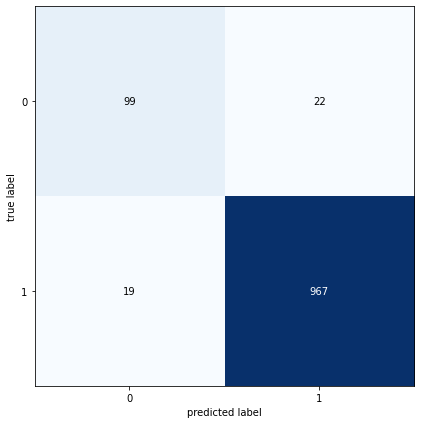

In [64]:
matriz1 = confusion_matrix(test_todas, prediction11)

plot_confusion_matrix(conf_mat=matriz1, figsize=(6,6), show_normed=False)
plt.tight_layout()

### PCA para Cantabria

Repetimos los pasos anteriores:

In [65]:
framesC = [train_C,test_C]
new_can = pd.concat(framesC)

Text(0, 0.5, 'Varianza explicada acumulada')

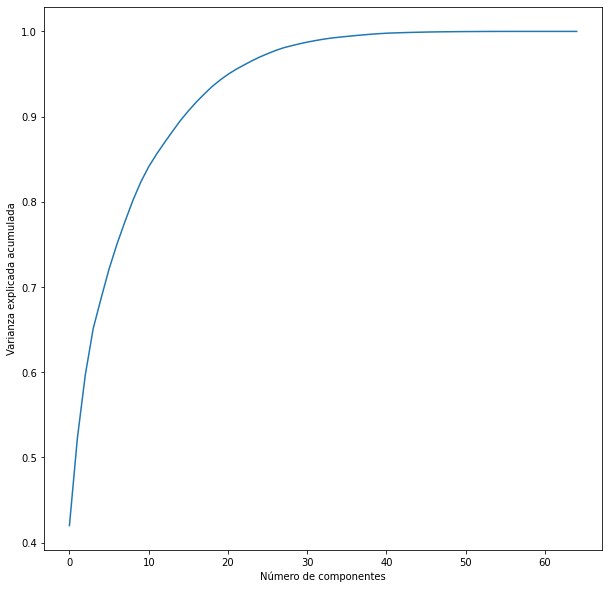

In [66]:
pca1 = PCA().fit(new_can)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')

En este caso, se seleccionan 25 componentes principales.

In [67]:
pca1 = PCA(n_components=25) #Inicializamos un objeto clase PCA
pca1.fit(new_can) #Calcula las direcciones de las componentes
X_r = pca1.fit_transform(new_can) #Transformamos los datos en el espacio reducido.
#Alternativa: sólo pca.fit_transform(X)
print(sum(pca1.explained_variance_ratio_))

0.9699066372667514


In [68]:
X_C = pd.DataFrame(X_r)

In [69]:
#Cantabria
seed(2022)
train_pob2, test_pob2 = train_test_split(X_C, test_size=0.3, shuffle=False)

Modelo de redes neuronales:

In [70]:
keras.backend.clear_session()

In [71]:
seed(2022)
model22 = Sequential()
model22.add(Dense(32, input_dim=train_pob2.shape[1], activation='relu'))
model22.add(Dense(1, activation='sigmoid'))

In [72]:
model22.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                832       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


In [73]:
optimizer22 = keras.optimizers.adam(lr=0.001)

In [74]:
model22.compile(loss='binary_crossentropy', optimizer=optimizer22, metrics=['accuracy'])

In [75]:
seed(2022)
history22 = model22.fit(train_pob2, train_todasC, epochs=128, batch_size=16, validation_split=0.3, verbose=1)

Train on 49 samples, validate on 21 samples
Epoch 1/128
49/49 [==============================] - 1s 15ms/step - loss: 0.9307 - acc: 0.4490 - val_loss: 0.7796 - val_acc: 0.5714
Epoch 2/128
49/49 [==============================] - 0s 467us/step - loss: 0.8645 - acc: 0.4898 - val_loss: 0.7383 - val_acc: 0.5714
Epoch 3/128
49/49 [==============================] - 0s 482us/step - loss: 0.8167 - acc: 0.4898 - val_loss: 0.7010 - val_acc: 0.5714
Epoch 4/128
49/49 [==============================] - 0s 521us/step - loss: 0.7603 - acc: 0.5306 - val_loss: 0.6688 - val_acc: 0.5714
Epoch 5/128
49/49 [==============================] - 0s 609us/step - loss: 0.7156 - acc: 0.5510 - val_loss: 0.6385 - val_acc: 0.6190
Epoch 6/128
49/49 [==============================] - 0s 580us/step - loss: 0.6717 - acc: 0.6122 - val_loss: 0.6103 - val_acc: 0.6190
Epoch 7/128
49/49 [==============================] - 0s 554us/step - loss: 0.6334 - acc: 0.6327 - val_loss: 0.5849 - val_acc: 0.5714
Epoch 8/128
49/49 [=======

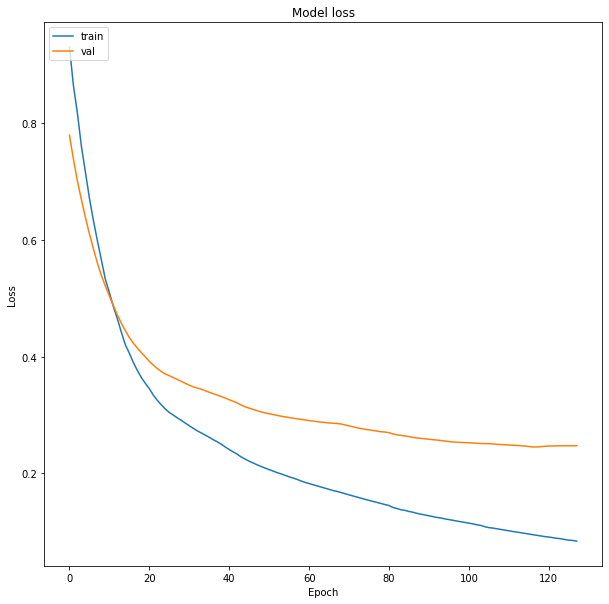

In [76]:
plt.plot(history22.history['loss'])
plt.plot(history22.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
plt.rcParams["figure.figsize"] = (10,10)

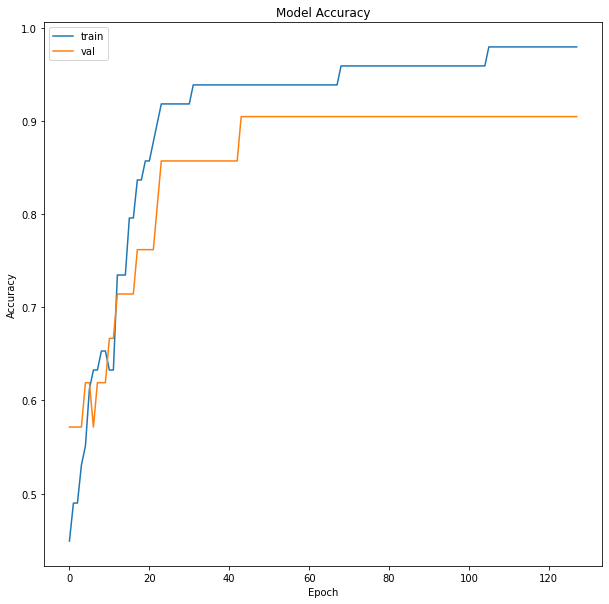

In [77]:
#Accuracy train y validation
plt.plot(history22.history['acc'])
plt.plot(history22.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Se ha empleado la misma red neuronal que se utilizó en el caso del dataset completo y los resultados obtenidos son muy similares.

#### Evaluación del modelo

In [78]:
prediction_C2 = model22.predict(test_pob2)

Curva ROC:

In [79]:
roc_auc_score(test_todasC, prediction_C2)

0.9259259259259259

In [80]:
roc_auc_score(test_todasC, prediction_C2)
false_positive_rate_todasC2, true_positive_rate_todasC2, threshold_todasC2 = roc_curve(test_todasC, prediction_C2)

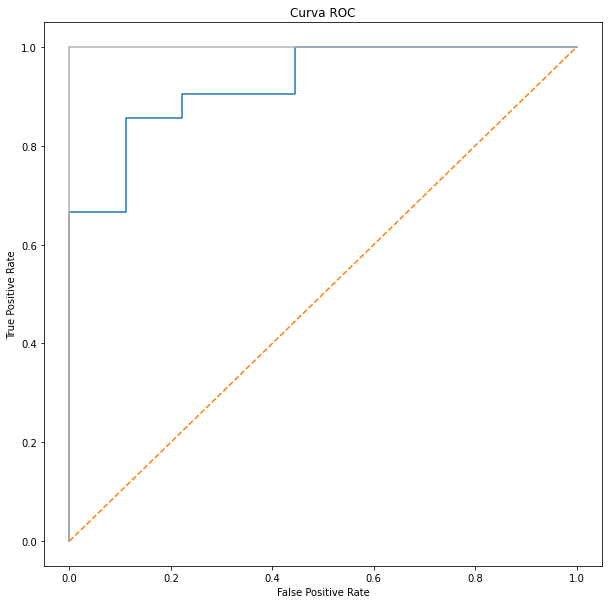

In [81]:
plt.subplots(1, figsize=(10,10))
plt.title('Curva ROC')
plt.plot(false_positive_rate_todasC2, true_positive_rate_todasC2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [82]:
prediction_C2

array([[0.02460802],
       [0.9973061 ],
       [0.2677485 ],
       [0.27228752],
       [0.999263  ],
       [0.9999981 ],
       [0.9999409 ],
       [0.87327206],
       [0.03954821],
       [0.9955972 ],
       [0.89528316],
       [0.11502992],
       [0.99820507],
       [0.485684  ],
       [0.60560113],
       [0.8459224 ],
       [0.99865544],
       [0.02256303],
       [0.55186975],
       [0.91754216],
       [0.7910173 ],
       [0.99954647],
       [0.41940948],
       [0.97775286],
       [0.99369943],
       [0.67647356],
       [0.14983179],
       [0.17694247],
       [0.32490438],
       [0.999959  ]], dtype=float32)

Matriz de confusión:

In [83]:
prediction_C2[prediction_C2 >= 0.5] = 1.0
prediction_C2[prediction_C2 < 0.5] = 0.0
prediction_C2 = pd.DataFrame(prediction_C2)
prediction_C2

,0
0,0.0
1,1.0
2,0.0
3,0.0
4,1.0
5,1.0
6,1.0
7,1.0
8,0.0
9,1.0


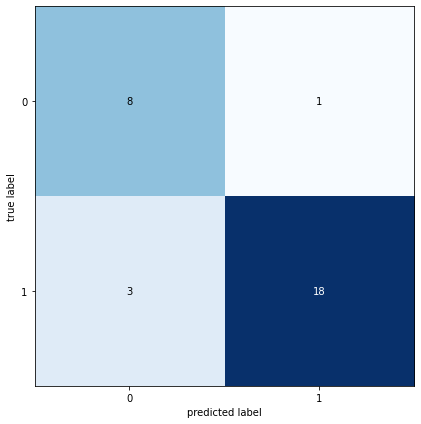

In [84]:
matriz2 = confusion_matrix(test_todasC, prediction_C2)

plot_confusion_matrix(conf_mat=matriz2, figsize=(6,6), show_normed=False)
plt.tight_layout()